<a href="https://colab.research.google.com/github/adityasingh1993/EIP4/blob/master/week2/Ninth_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


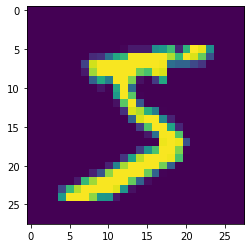

In [63]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

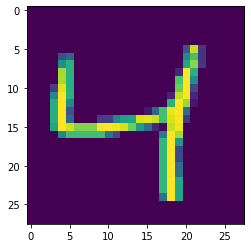

In [64]:
plt.imshow(X_train[2])

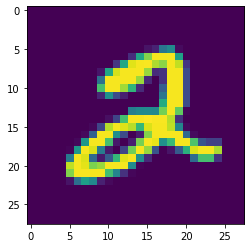

In [65]:
plt.imshow(X_train[5])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [71]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [81]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(8, 3, 3, activation='relu',  use_bias=False,input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, use_bias=False,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 1, 1,use_bias=False, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 3, 3, use_bias=False,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,use_bias=False, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,use_bias=False, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,use_bias=False, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4,use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))
#model.add(Convolution2D(10, 1,1, activation='relu'))

model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", use_bias=False, input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False, activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), use_bias=False, activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False, activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False, a

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_217 (Conv2D)          (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_178 (Bat (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_178 (Dropout)        (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 24, 24, 16)        1152      
_________________________________________________________________
batch_normalization_179 (Bat (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_179 (Dropout)        (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_219 (Conv2D)          (None, 24, 24, 16)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4), use_bias=False)`


In [84]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.1* 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.1), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.1.
60000/60000 [==============================] - 32s 528us/step - loss: 0.1322 - acc: 0.9451 - val_loss: 0.0874 - val_acc: 0.9791
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0758150114.
60000/60000 [==============================] - 13s 213us/step - loss: 0.1136 - acc: 0.9497 - val_loss: 0.0299 - val_acc: 0.9901
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0610500611.
60000/60000 [==============================] - 13s 218us/step - loss: 0.1072 - acc: 0.9520 - val_loss: 0.0334 - val_acc: 0.9908
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0510986203.
60000/60000 [==============================] - 13s 211us/step - loss: 0.0975 - acc: 0.9556 - val_loss: 0.0198 - val_acc: 0.9939
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0439367311.
60000/60000 [====

In [83]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.021947827632331246, 0.9938]


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 22, 22, 8)         400       
_________________________________________________________________
flatten_3 (Flatten)          (None, 3872)              0         
_________________________________________________________________
activation_3 (Activation)    (None, 3872)              0         
Total params: 400
Trainable params: 400
Non-trainable params: 0
_________________________________________________________________
